Digilent WaveForms SDK versione 3.22.2
Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1
[-1.41848845e-03  3.61126293e-03  1.26404562e-03 -2.08912197e-03
 -7.47854933e-04  3.27594617e-03 -2.42443873e-03  3.27594617e-03
  1.59936238e-03 -7.72214153e-05 -7.72214153e-05 -2.08912197e-03
 -7.72214153e-05  5.93412102e-04  3.27594617e-03  1.26404562e-03
 -7.47854933e-04  9.28728861e-04  2.58095343e-04  1.93467914e-03
  1.26404562e-03  1.93467914e-03  5.93412102e-04  5.93412102e-04
  1.93467914e-03  3.94657969e-03 -2.75975548e-03  3.27594617e-03
 -4.12538174e-04 -7.72214153e-05  1.26404562e-03 -1.75380521e-03
  1.26404562e-03  1.59936238e-03  2.94062941e-03 -2.08912197e-03
  2.60531265e-03  1.26404562e-03  1.26404562e-03 -7.72214153e-05
  1.59936238e-03 -2.08912197e-03 -7.72214153e-05  5.93412102e-04
  1.26404562e-03 -7.72214153e-05  9.28728861e-04 -1.08317169e-03
  2.58095343e-04 -4.12538174e-04  5.93412102e-04  5.93412102e-04
  5.93412102e-04  1.93467914e-03  1.26404562e-0

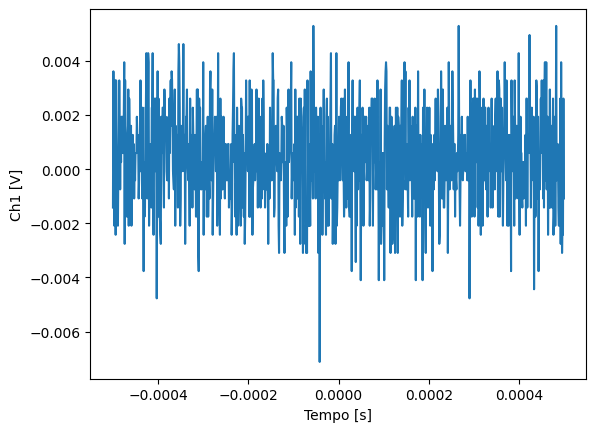

In [1]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile.txt", data, delimiter="\t")

plt.show()

Attese misure vicine a 0 perché stiamo misurando la ddp su un corto circuito. Otteniamo misura molto rumorosa (giustificato, probabilmente, dal fatto che non il corto circuito non è collegato a terra), con range di variabilità dato da +/- 0.02V.

[-4.12538174e-04  1.40060824e-02  6.59801800e-02  6.32976460e-02
 -4.43633928e-03 -2.05315437e-02 -2.08668605e-02 -1.65077426e-02
 -1.71783761e-02 -1.68430593e-02 -1.58371091e-02  2.94306533e-02
 -5.44228955e-03  3.61126293e-03  2.40655852e-02  2.58095343e-04
  2.26999590e-03  2.10477344e-02  7.29974728e-03 -7.72214153e-05
  1.83652003e-02  6.83273974e-02  6.63154968e-02  6.06151119e-02
 -1.85196431e-02 -1.55017923e-02 -1.55017923e-02 -1.55017923e-02
 -1.28192582e-02 -1.31545750e-02  2.57421690e-02 -9.13077390e-03
  1.23294987e-02  2.47362187e-02 -3.76570576e-03  5.62316348e-03
  2.10477344e-02  3.61126293e-03  5.95848024e-03  1.76945668e-02
  8.30569755e-03  2.20536847e-02  6.46389130e-02  6.69861303e-02
 -2.15374940e-02 -1.88549599e-02 -1.71783761e-02 -1.58371091e-02
 -1.58371091e-02 -1.58371091e-02 -1.34898918e-02  2.47362187e-02
  1.63532998e-02 -7.45419011e-03  1.70239333e-02  1.76945668e-02
 -3.43038900e-03  1.23294987e-02  1.87005171e-02  9.28728861e-04
  7.97038079e-03  6.66508

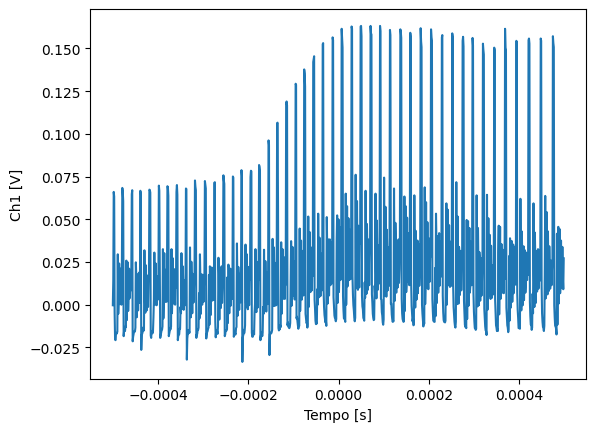

In [3]:

scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile1.txt", data, delimiter="\t")

plt.show()

Atteso un segnale DC con sovrapposto rumore a 50Hz, ma si registrano oscillazioni smorzate periodiche, probabilmente dovute alle capacità ed induttanze parassite di AD2 e fili collegati alle porte seriali.
Aggiunto dopo la funzione scope.sample() la funzione time.sleep(0.5) per tagliare acquisizioni in cui si vedeva il transiente necessario ad AD2 per stabilizzarsi (tale intervallo assomigliava ad una carica di un condensatore, con sovrapposte le stesse oscillazioni smorzate, cfr. fig.3), a seguito del quale si registra anche una diminuzione in ampiezza degli spikes di circa metà.

Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[-0.20030184 -0.06338085 -0.02999371 -0.16387951 -0.10014043 -0.03775032
 -0.12644544 -0.11936332 -0.05191456 -0.10722255  0.55040294  0.57974315
  0.57097481 -0.50179784 -0.51697381 -0.49370398 -0.4738066  -0.48493564
 -0.4953902   0.01890665 -0.37027274 -0.12779442  0.06106213 -0.22019923
 -0.1753458   0.02531428 -0.13858622 -0.19085902 -0.00537491 -0.08833689
 -0.19423146 -0.04618141 -0.06709053 -0.17703202 -0.0853017  -0.07248643
  0.63100421  0.65292506  0.63336492 -0.52810285 -0.53518498 -0.52439317
 -0.51157791 -0.50213508 -0.50449579  0.0570152  -0.18006721 -0.37971557
 -0.00368869 -0.08833689 -0.33014072 -0.06405533 -0.06236912 -0.27247203
 -0.11363018 -0.06270636 -0.23503796 -0.14398212 -0.04955385 -0.18040446
 -0.1945687  -0.09777972 -0.15477393  0.63538838  0.64685467  0.63302768
 -0.54159261 -0.56890936 -0.56992109 -0.55575685 -0.54631402 -0.54159261
 -0.08563894 -0.48729635 -0.10351286 -0.02898198 -0.376

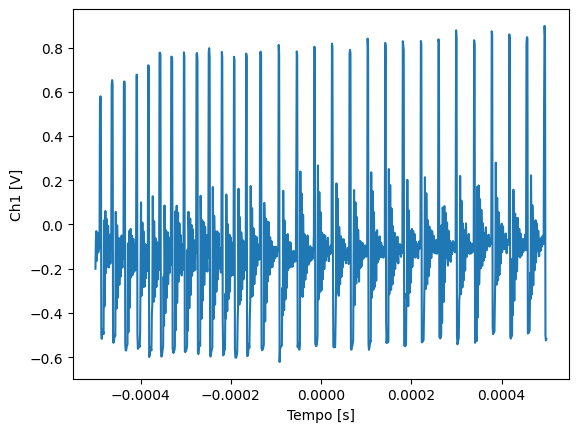

In [11]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile.txt", data, delimiter="\t")

plt.show()

Abbiamo capito che il rumore del segnale era dovuto all'alimentatore del PC, scollegato questo otteniamo un segnale di questo tipo, come ci aspettavamo:

Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[-9.90737152e-04 -2.00246866e-03  2.09943594e-05 -3.35144401e-03
 -2.67695634e-03 -9.90737152e-04 -3.16249478e-04 -3.16249478e-04
 -3.16249478e-04 -3.16249478e-04 -9.90737152e-04  3.58238197e-04
  3.58238197e-04 -9.90737152e-04 -2.00246866e-03 -4.70041936e-03
 -1.66522483e-03 -2.67695634e-03  1.36996971e-03  1.36996971e-03
  2.09943594e-05 -6.53493315e-04 -1.32798099e-03 -2.33971250e-03
 -2.00246866e-03 -3.01420018e-03  3.58238197e-04  2.09943594e-05
  1.03272587e-03 -6.53493315e-04 -6.53493315e-04  2.09943594e-05
 -1.32798099e-03 -3.01420018e-03 -3.01420018e-03 -6.53493315e-04
 -1.66522483e-03 -2.33971250e-03 -9.90737152e-04 -1.66522483e-03
 -1.32798099e-03  2.09943594e-05  3.58238197e-04 -1.32798099e-03
 -2.67695634e-03  2.09943594e-05 -2.00246866e-03  3.58238197e-04
 -1.32798099e-03  2.09943594e-05 -1.66522483e-03 -4.70041936e-03
 -2.33971250e-03 -1.32798099e-03  6.95482034e-04 -1.32798099e-03
 -3.16249478e-04 -9.9

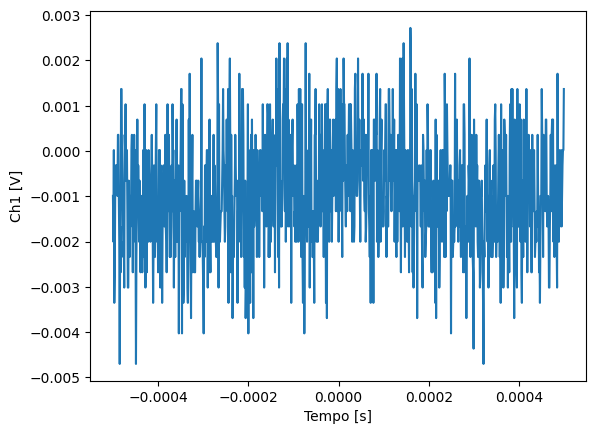

In [4]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time 

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile2.txt", data, delimiter="\t")

plt.show()

Per avere una stima approssimativa della risoluzione strumentale, plottiamo i dati in punti per vedere la discretizzazione digitale e quindi la risoluzione.

Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[ 6.95482034e-04 -6.53493315e-04 -6.53493315e-04  2.09943594e-05
  1.36996971e-03  1.03272587e-03  1.03272587e-03 -1.32798099e-03
  3.58238197e-04 -9.90737152e-04 -2.67695634e-03 -1.66522483e-03
 -1.66522483e-03 -6.53493315e-04  3.58238197e-04 -2.33971250e-03
 -2.00246866e-03 -3.68868785e-03 -9.90737152e-04 -9.90737152e-04
 -1.32798099e-03  2.09943594e-05 -6.53493315e-04 -9.90737152e-04
 -3.35144401e-03 -1.66522483e-03 -6.53493315e-04 -2.67695634e-03
 -2.00246866e-03 -1.32798099e-03 -9.90737152e-04 -2.00246866e-03
  6.95482034e-04 -3.16249478e-04 -1.66522483e-03  2.09943594e-05
 -3.16249478e-04 -6.53493315e-04  1.03272587e-03 -2.00246866e-03
 -3.16249478e-04 -2.67695634e-03  3.58238197e-04 -2.00246866e-03
  2.09943594e-05  2.09943594e-05 -2.33971250e-03 -1.32798099e-03
 -6.53493315e-04 -2.67695634e-03 -2.00246866e-03  3.58238197e-04
 -3.16249478e-04 -3.16249478e-04 -1.66522483e-03 -1.66522483e-03
 -1.32798099e-03  1.7

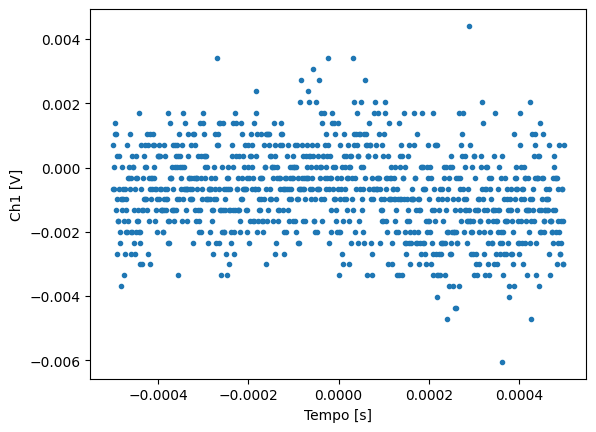

In [5]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time 

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals, '.')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile1.txt", data, delimiter="\t")

plt.show()

Si vedono dunque righe orizzontali di punti e la spaziatura tra le righe, data dalla discretizzazione digitale, è proporzionale alla risoluzione strumentale. 
Infatti, le righe sono distanziate a multipli di circa 0.3mV, dato da \frac{5V}{2^14}, dove 14 è il numero di bit con cui lavora l'ADC dell'oscilloscopio, che corrisponde alla risoluzione strumentale.
L'altra opzione di range possibile per AD2 è 50V, quindi la risoluzione aumenta di un fattore 10, e di conseguenza anche la spaziatura fra le righe, che quindi sarà circa 3mV. Si perdono dunque la maggior parte dei punti visti nel grafico precedente.

Digilent WaveForms SDK versione 3.22.2
Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[ 0.02742441  0.04225556  0.03113219  0.02000883  0.04596334  0.00146989
  0.01630104  0.01630104  0.00888547  0.04967113  0.03483998  0.02371662
  0.03854777  0.02000883  0.03113219  0.02000883  0.02000883  0.03113219
  0.04225556  0.02371662  0.02000883  0.04596334  0.02000883  0.01259325
  0.01259325  0.01630104  0.00888547  0.02000883  0.02000883  0.01259325
  0.01630104  0.00888547  0.01630104  0.02000883  0.03113219  0.02742441
  0.02742441  0.02742441  0.03113219  0.03113219  0.02371662  0.03854777
  0.04225556  0.03113219  0.00888547  0.02000883  0.01630104  0.01630104
  0.02000883  0.02742441  0.04596334  0.00888547  0.03854777  0.02742441
  0.00146989  0.02742441  0.03483998  0.01630104  0.02371662  0.03854777
  0.00517768  0.01259325  0.02371662  0.03483998  0.01630104  0.02742441
  0.03113219  0.02371662  0.02742441  0.04596334  0.02742441  0.01259325
 -0.0022379   0.

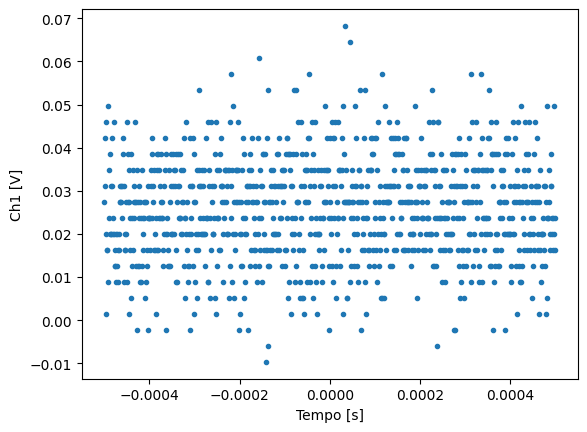

In [1]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time 

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 50 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals, '.')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile1.txt", data, delimiter="\t")

plt.show()

Avendo dato ad AD2 50V di range riesce a misurare anche voltaggi più alti, quindi mi ritrovo con un segnale più alto in Volt, con righe equispaziate tra loro a multipli interi di circa 3mV

Dispositivo #1 [SN:210321B5D136, hdwf=2] connesso!
Configurazione #1
[ 9.28728861e-04  2.58095343e-04  2.58095343e-04  1.59936238e-03
  5.93412102e-04 -7.72214153e-05  2.58095343e-04  9.28728861e-04
  5.93412102e-04 -4.12538174e-04  2.58095343e-04  5.93412102e-04
  2.58095343e-04  2.58095343e-04  2.58095343e-04  1.26404562e-03
  5.93412102e-04  1.59936238e-03  2.58095343e-04  5.93412102e-04
  9.28728861e-04  2.58095343e-04  2.58095343e-04  2.58095343e-04
  5.93412102e-04 -7.72214153e-05  2.58095343e-04  2.58095343e-04
  2.58095343e-04  2.58095343e-04  9.28728861e-04  2.58095343e-04
  2.58095343e-04  9.28728861e-04  5.93412102e-04 -4.12538174e-04
 -4.12538174e-04  1.26404562e-03  2.58095343e-04  9.28728861e-04
  2.58095343e-04 -7.72214153e-05 -7.72214153e-05  5.93412102e-04
 -7.72214153e-05 -7.72214153e-05  2.58095343e-04  9.28728861e-04
 -7.47854933e-04 -4.12538174e-04 -7.72214153e-05  9.28728861e-04
  9.28728861e-04  2.58095343e-04  2.58095343e-04 -7.72214153e-05
  5.93412102e-04  2.5

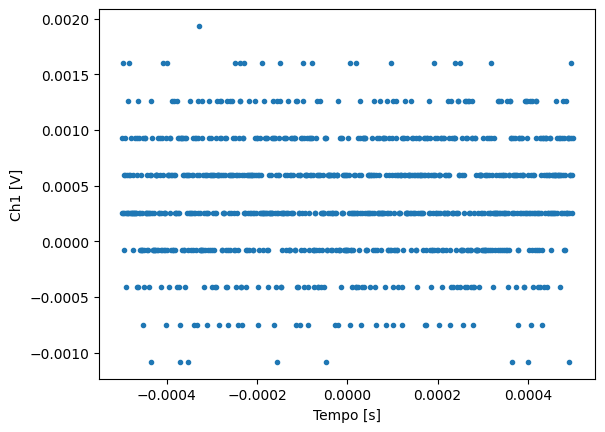

In [2]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time 

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch1.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals, '.')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile3.txt", data, delimiter="\t")

plt.show()

Come atteso, non c'è nessuna variazione della risoluzione strumentale ma, mediando, si guadagna in precisione e diminuisce lo spread.